## Data Flight Analysis

### Summary of Workflow and Thought Process
This analysis explores flight data to understand pricing trends, passenger behaviors, and service impacts. Key steps include data cleaning, identifying outliers, visualizing distributions, and analyzing correlations. Additional features like revenue per hour were created for deeper insights.


**1. Data Loading and Initial Exploration:**
- Loaded the dataset to understand its structure, preview data, and identify potential issues such as missing values or duplicates.
- Used descriptive statistics and data inspection to gain insights into variable distributions and basic dataset characteristics.


**2. Data Cleaning:**
- Addressed data quality issues by removing duplicates and filling missing values for specific columns like delay. This ensured the dataset was ready for analysis.


**3. Univariate Analysis:**
- Examined the distribution of coach prices using histograms and boxplots to identify patterns such as skewness, central tendency, and outliers.


**4. Exploration of Key Relationships:**
- Investigated how specific features like inflight services (meals, entertainment, Wi-Fi) impact coach prices using boxplots.
- Conducted correlation analysis to assess relationships between numerical variables and identify strong associations.

**5. Bivariate and Multivariate Analysis:**
- Visualized relationships between flight hours and passenger count using scatterplots to understand trends and interactions.
- Analyzed the interplay between pricing and weekdays/weekends, incorporating categorical and numerical variables in boxplots.


**6. Feature Engineering:**
- Created a new feature, revenue_per_hour, to deepen insights into revenue efficiency based on flight duration and coach prices.


**7. Insights and Conclusions:**
- Summarized key findings such as the influence of flight duration on prices, the impact of weekends on pricing, and the importance of inflight services.
- Highlighted actionable insights for stakeholders, such as leveraging inflight services for premium pricing or adjusting prices based on time and passenger trends.

#### Let´s start our Analysis

##### Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##### Load data

In [2]:
flight = pd.read_csv("flight.csv")

##### Initial exploration. 
Because we want to do this in a simply step, we will use a function and the we can call it


In [3]:
def inspect_data(df):
    print("\n--- Preview ---")
    print(df.head())
    print("\n--- Statistical Summary ---")
    print(df.describe(include='all'))
    print("\n--- Missing Values ---")
    print(df.isnull().sum())
    print("\n--- Duplicates ---")
    print(df.duplicated().sum())

#nwo we can simply call the function and pass the dataset as arguent
inspect_data(flight)


--- Preview ---
   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  

--- Statistical Summary ---
                

##### Go over the mean and median values of the coach prices for all the tickets

In [4]:
mean_prices = np.mean(flight.coach_price)
print("\n--- Mean Price of the Tickets ---")
print(mean_prices)

median_prices = np.median(flight.coach_price)
print("\n--- Medianan Price of the Tickets ---")
print(median_prices)


--- Mean Price of the Tickets ---
376.58525308213905

--- Medianan Price of the Tickets ---
380.56


#####  Data cleaning

In [5]:
# Remove duplicates
flight = flight.drop_duplicates()

# Fill missing values (if necessary)
flight.fillna({'delay': 0}, inplace=True)

##### Distribution of coach class prices


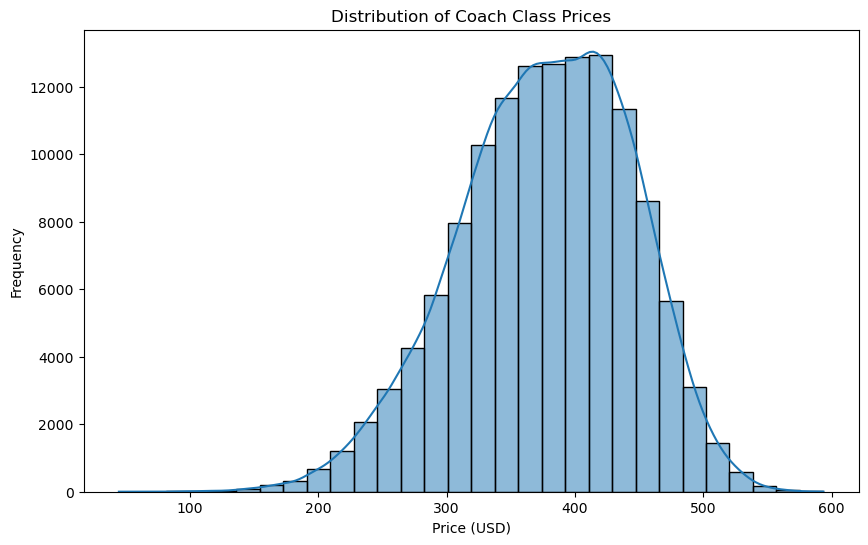

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(flight['coach_price'], bins=30, kde=True)
plt.title("Distribution of Coach Class Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

What will be the distribution of the shortest flights tickets? Lets chek is th distribution will cahnge in flights, lets say, flights wich duration are shorter than 4 hours?

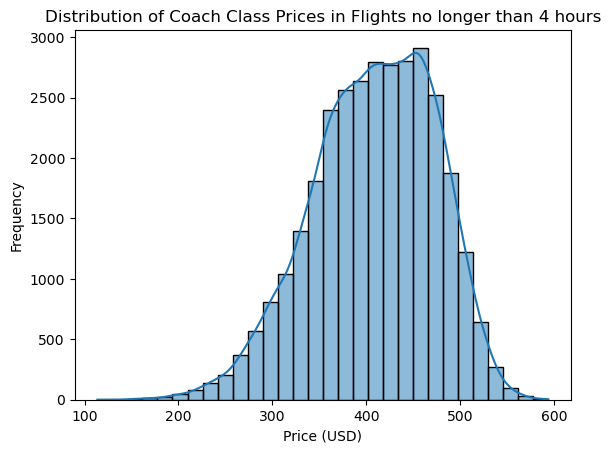

<Figure size 640x480 with 0 Axes>

In [7]:
sns.histplot(flight.coach_price[flight.hours > 4], bins=30, kde=True)
plt.title("Distribution of Coach Class Prices in Flights no longer than 4 hours")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()
plt.clf()

##### Identifying outliers
Let´s see if we have atypics values

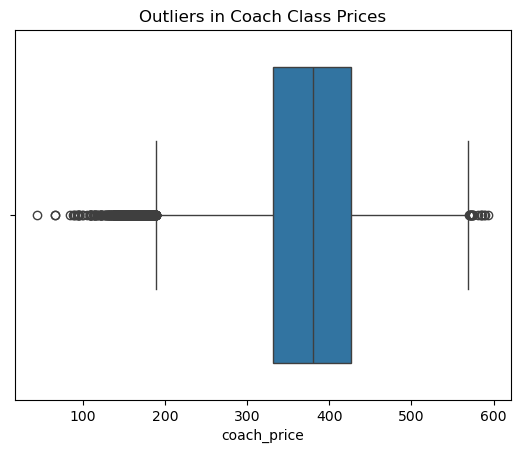

In [8]:
sns.boxplot(x='coach_price', data=flight)
plt.title("Outliers in Coach Class Prices")
plt.show()

##### Relationship between prices and services


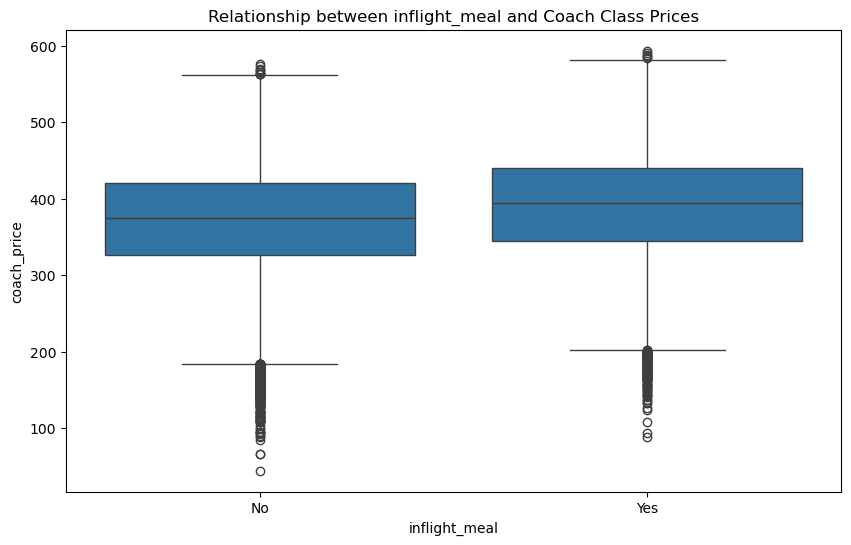

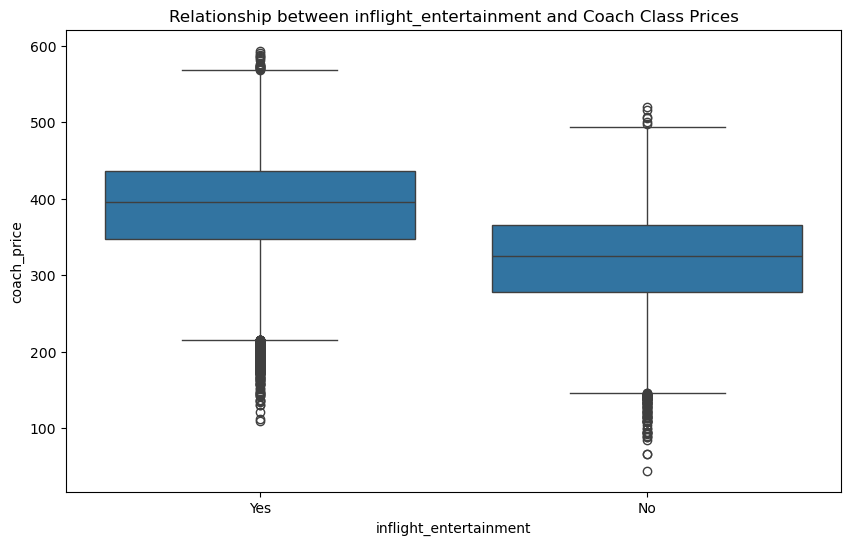

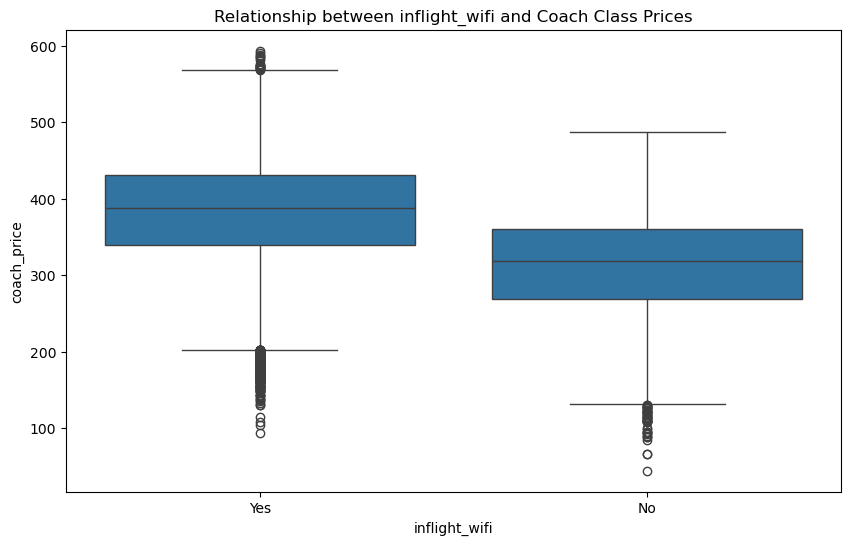

In [9]:
features = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='coach_price', data=flight)
    plt.title(f"Relationship between {feature} and Coach Class Prices")
    plt.show()

##### We can also visualize the relationship between coach and first-class prices on weekends compared to weekdays.

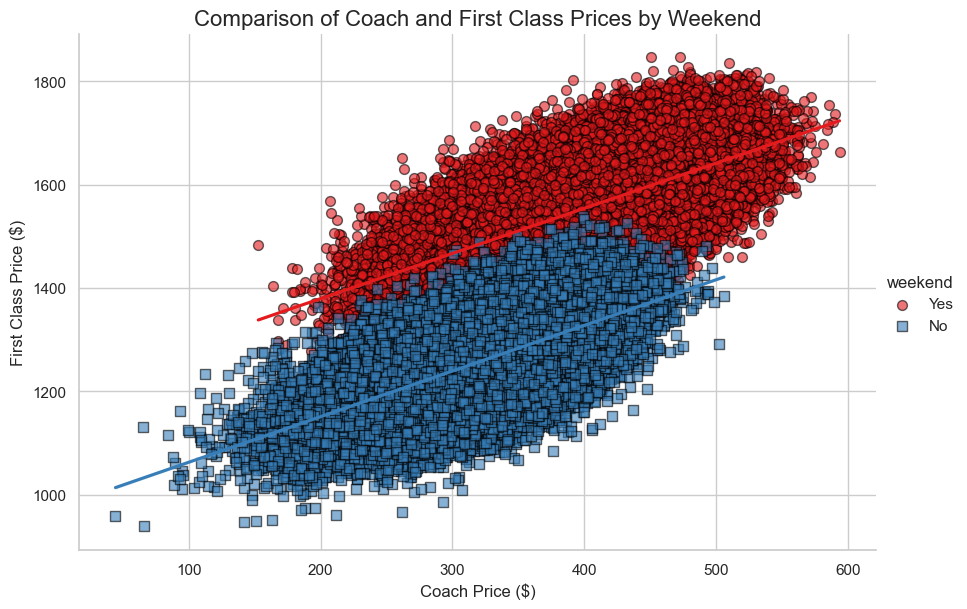

<Figure size 640x480 with 0 Axes>

In [10]:
sns.set(style="whitegrid")
sns.lmplot(
    x='coach_price', 
    y='firstclass_price', 
    hue='weekend', 
    data=flight, 
    fit_reg=True,  # here we add a linear regresion basic line to see the trend
    markers=["o", "s"],  
    palette="Set1",
    aspect=1.5, 
    height=6,  
    scatter_kws={'s': 50, 'alpha': 0.6, 'edgecolor': 'black'})
plt.title("Comparison of Coach and First Class Prices by Weekend", fontsize=16)
plt.xlabel("Coach Price ($)", fontsize=12)
plt.ylabel("First Class Price ($)", fontsize=12)
plt.show()
plt.clf()

##### Correlation analysis

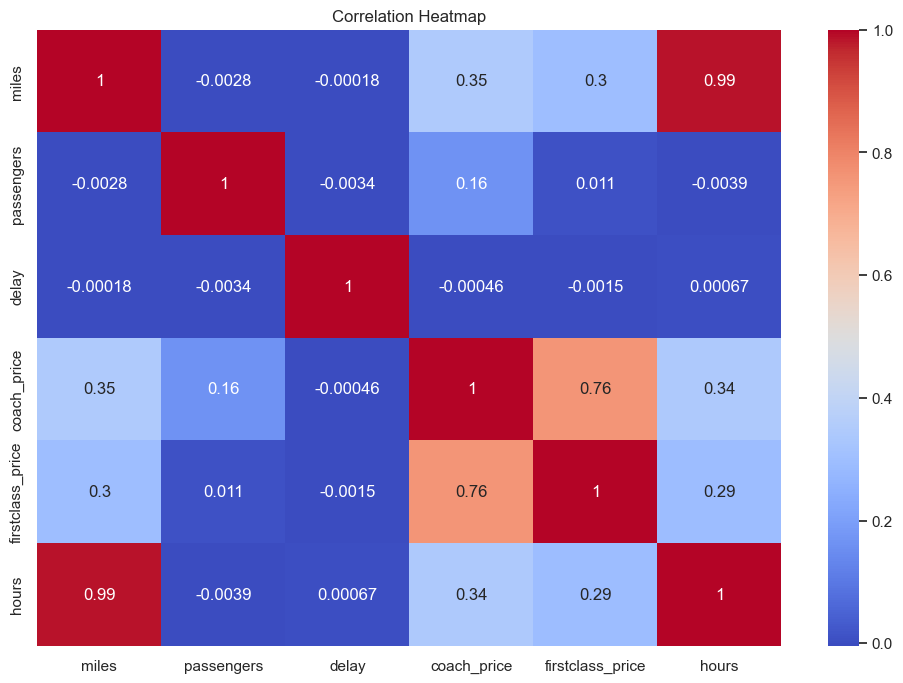

In [11]:
# Select only numeric columns for the correlation matrix
numeric_flight = flight.select_dtypes(include=[np.number])
corr_matrix = numeric_flight.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


##### Relationship between flight hours and passenger count


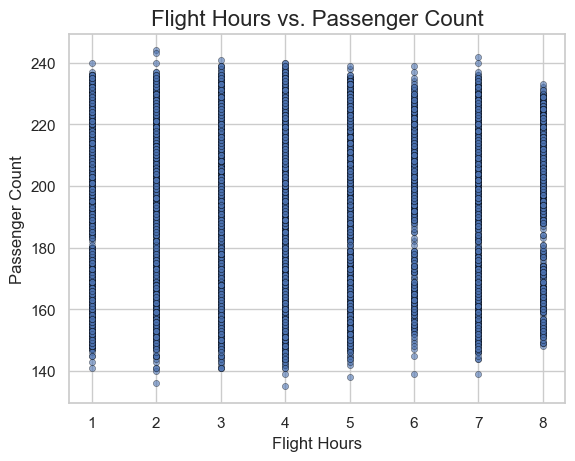

In [12]:
sns.scatterplot(x='hours', y='passengers', data=flight, alpha=0.6, s=20,edgecolor="black")
plt.title("Flight Hours vs. Passenger Count", fontsize=16)
plt.xlabel("Flight Hours")
plt.ylabel("Passenger Count")
plt.show()

##### Additional transformations
We will create a new column: *revenue per hour*

In [13]:
flight['revenue_per_hour'] = flight['coach_price'] / flight['hours']
print(flight[['coach_price', 'hours', 'revenue_per_hour']].head())


   coach_price  hours  revenue_per_hour
0      338.820      1        338.820000
1      472.655      6         78.775833
2      351.960      3        117.320000
3      387.835      2        193.917500
4      374.735      2        187.367500


##### Visualization of days of the week and prices


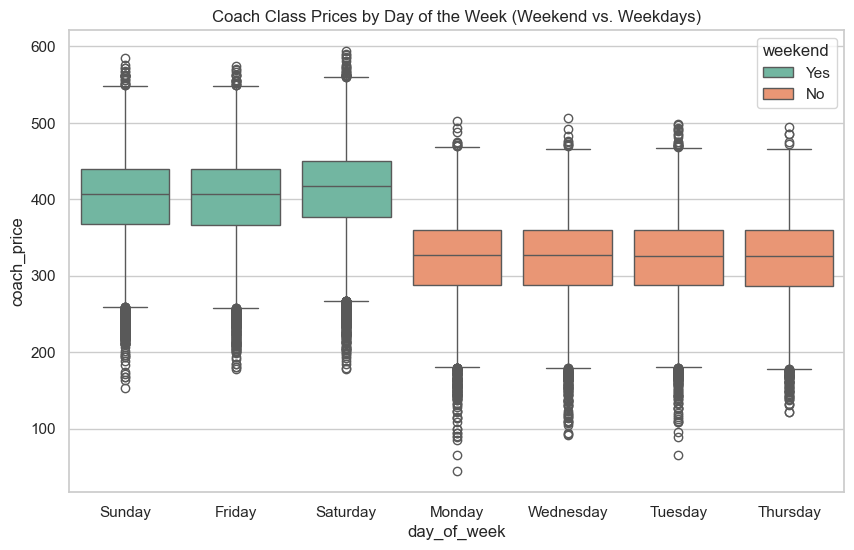

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='coach_price', hue='weekend', data=flight, palette='Set2')
plt.title("Coach Class Prices by Day of the Week (Weekend vs. Weekdays)")
plt.show()

### Conclusions:

1. Longer flights tend to have higher prices, both in coach and first class.
2. Weekends show higher average prices.
3. Services such as inflight meals and entertainment influence coach class prices.
4. The relationship between flight hours and passenger count appears linear, suggesting adjusted capacity.
